# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The aim of this report is to analyze the TMDb movie dataset and draw some insights from the data. The main goal is to understand the data and answer the following questions:

-What is the relationship between adjusted revenue and adjusted budgets? Do higher budgets lead to higher revenue based on historical data?

-How has the runtime changed over the years and is a longer runtime a leading indicator to a higher adjusted revenue?

-Who are the top 10 directors based on adjusted revenue and how much revenue has each director brought in on average?



In [4]:
#Import all libraries that will be used in the report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

The first step in my data analysis process is to load the data and print the first 5 rows to check for cleanliness and understand the type of data available for analysis.

### General Properties

In [5]:
# Load data and print first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Get an idea of the size and the number of columns of the data
df.shape

(10866, 21)

In [5]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [22]:
#Get a statistical snapshot of the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,0.693143,1.612525e+07,4.407785e+07,102.744340,238.622578,5.966459,2000.890271,1.935070e+07,5.685528e+07
std,1.035525,3.216819e+07,1.224038e+08,28.134561,602.081472,0.914291,13.032372,3.562179e+07,1.512243e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231581,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418756,1.403930e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.410618e+05,0.000000e+00
75%,0.774232,1.900000e+07,3.064621e+07,112.000000,172.000000,6.600000,2011.000000,2.439107e+07,4.255193e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


Looking at the initial data, there are 21 columns in total. After reviewing the data not all columns will be useful for my analysis and therefore the next step remove the unnecessary columns, delete duplicate and NaN values. 

### Data Cleaning (Remove columns, duplicates and NaN values)

In [7]:
#Dropping the columns I am not going to use in my analysis
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)


In [9]:
#Check for duplicates
sum(df.duplicated())

1

In [11]:
#Remove the duplicate
df.drop_duplicates(inplace=True)

In [146]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [147]:
#Remove NaN values to address the missing values identified above
df.dropna(subset=['director'], inplace=True)  
df.dropna(subset=['genres'], inplace=True)
df.dropna(subset=['production_companies'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


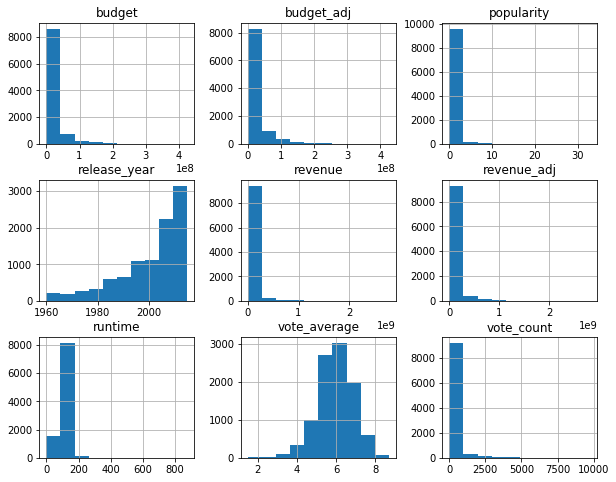

In [148]:
#Get a feel of the distribution of the data after the clean up
df.hist(figsize=(10,8));

In [14]:
#Save progress
df.to_csv('tmdb-movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is in good shape, I can start with the analytical piece of this project.

### Research Question 1: What is the relationship between adjusted revenue and adjusted budgets? Do higher budgets lead to higher revenue based on historical data?

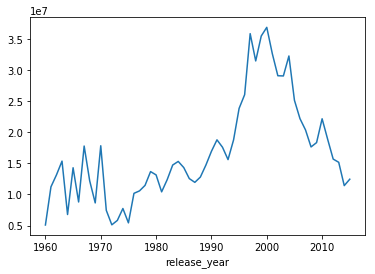

In [44]:
#How are budgets trending over time? Calculating the mean and vizualizing the amount spent over time
df.groupby('release_year').budget_adj.mean().plot(kind='line');

In [149]:
df.budget_adj.mean()

19350695.509587873

Looking at the graph above, adjusted budgets have increase sharply since the 1990s but experienced a drop around 2010. 


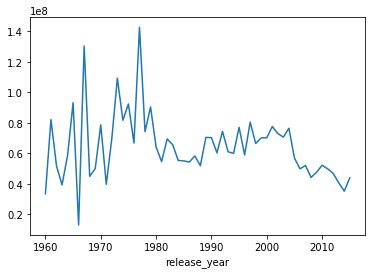

In [150]:
#How are revenue trending over time? Calculating the mean and vizualizing the amount earned over time
df.groupby('release_year').revenue_adj.mean().plot(kind='line');

In [151]:
df.revenue_adj.mean()

56855277.83124021

Looking at the graph above, unlike adjusted budgets, adjusted revenues have gone down since 1990s.

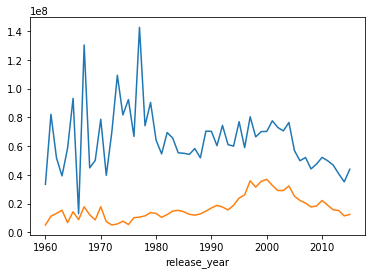

In [57]:
#Putting it all together, vizualizing the adjusted budget and revenue on the same line chart
df.groupby('release_year').revenue_adj.mean().plot(kind='line')
df.groupby('release_year').budget_adj.mean().plot(kind='line');

My initial intuition was that if budgets are going higher, the production companies are making more interesting and engaging movies leading to higher revenue. However the data point to the opposite conclusion, revenues are declining despite the higher budgets. 



### Research Question 2: How has the runtime changed over the years and is a longer runtime leading to higher adjusted revenue?

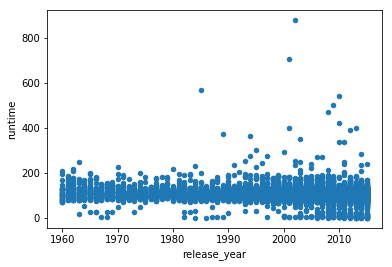

In [153]:
#Scatter plot of runtime and release year
df.plot(x='release_year', y='runtime', kind='scatter');

Runtime has changed over the years, there are more longer movies past the 1990s but also shorter runtimes have increased as well. The data points to more consistent runtimes from 19060 - 1990 (less scattered data) and from 1990s the variety of runtimes has changed (the data os more scattered).


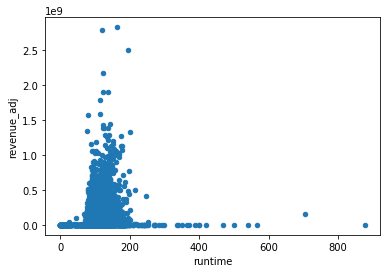

In [6]:
#Scatter plot of runtime and adjusted revenue
df.plot(x='runtime', y='revenue_adj', kind='scatter');

There seems to be a sweet spot when it comes to runtime and revenue. Anything over 200 and below 70 runtime won't earn you much. The highest revenue come from movies around 100 runtime.


In [109]:
#Stats on runtime
df.runtime.describe()

count    9806.000000
mean      102.744340
std        28.134561
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

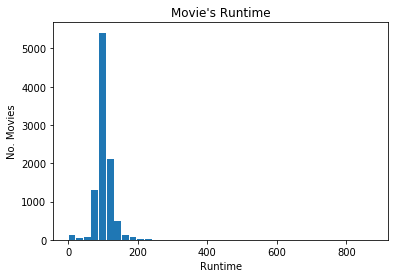

In [154]:
#Distribution of movie runtime
plt.hist(df['runtime'], bins = 40, rwidth = 0.9)
plt.title("Movie's Runtime")
plt.xlabel("Runtime")
plt.ylabel("No. Movies");



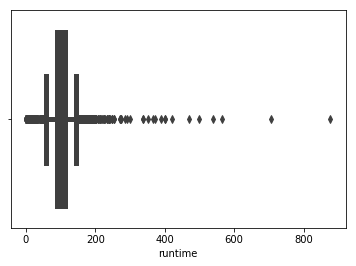

In [156]:
#Another way of vizualing the distribution of movie runtime
sns.boxplot(df['runtime'], linewidth = 5);

### Research Question 3: Who are the top 10 directors based on adjusted revenue and how much revenue has each director brought in on average?

In [21]:
#Calculating the total revenue adjusted by the top 10 directors
df.groupby('director').sum().revenue_adj.nlargest(10)

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Michael Bay         5.460672e+09
Chris Columbus      5.094077e+09
Tim Burton          4.529285e+09
Ron Howard          4.527095e+09
Ridley Scott        4.219566e+09
Name: revenue_adj, dtype: float64

<a id='conclusions'></a>
## Conclusions

The above outlined analysis points to the following insights:
    
    A higher budget does not necessarily guarantees a higher return on investment (revenue). There has been an increased in the budgets spent on movies from 1990s to 2010. Adjusted revenues however moved in the opposite direction, there is a decline in 1990s compared to the previous years. 
    
    There is a sweet spot when it comes to runtime and revenue, which is around 100 minutes. Anything below 70 or above 200 runtime minutes won't bring much of a return.
    
    The top 3 directors in terms of revenues are Steven Splilberg, James Cameron and Peter Jackson. 